## Import packages and datasets

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
mm1_3 = pd.read_csv(r'C:\Users\lyejie\de_tenure_1-3.csv')
mm4_6 = pd.read_csv(r'C:\Users\lyejie\de_tenure_4-6.csv')
mm7_12 = pd.read_csv(r'C:\Users\lyejie\de_tenure_7-12.csv')
mm13_ = pd.read_csv(r'C:\Users\lyejie\de_tenure_13+.csv')

In [4]:
# Check output
mm13_.head()

,current_customer_id,ct_listen_total_audioshows_p90,ct_listen_total_originals_p90,ct_listen_total_under_1_hour_p90,listen_total,ct_sessn_wma_detail_p90,ct_sessn_wma_pc_p90,ct_sessn_wma_moble_p90,ct_tot_open_p90,ct_tot_click_p90,marketplace_id,tenure_grp
0,1941142,0,0,0,3690,NaN,NaN,NaN,0.0,0.0,36071,MM13+
1,10436671,0,0,4548,117850,2.0,0.0,0.0,3.0,0.0,36071,MM13+
2,10954749,0,0,0,103146,18.0,2.0,0.0,2.0,0.0,36071,MM13+
3,24460852,0,0,0,313433,79.0,0.0,11.0,10.0,5.0,36071,MM13+
4,24757552,0,0,0,12343,36.0,0.0,5.0,0.0,0.0,36071,MM13+


## Data cleaning: Replace NAs + Remove erroneous data

In [5]:
# Define: Replace NAs 
def replace_na(dataframe):
    for i in range(len(dataframe.columns)):
        dataframe.iloc[:,i].fillna(0,inplace=True)
    return dataframe

In [6]:
# Replace NA
replace_na(mm1_3)
replace_na(mm4_6)
replace_na(mm7_12)
replace_na(mm13_)

,current_customer_id,ct_listen_total_audioshows_p90,ct_listen_total_originals_p90,ct_listen_total_under_1_hour_p90,listen_total,ct_sessn_wma_detail_p90,ct_sessn_wma_pc_p90,ct_sessn_wma_moble_p90,ct_tot_open_p90,ct_tot_click_p90,marketplace_id,tenure_grp
0,1941142,0,0,0,3690,0.0,0.0,0.0,0.0,0.0,36071,MM13+
1,10436671,0,0,4548,117850,2.0,0.0,0.0,3.0,0.0,36071,MM13+
2,10954749,0,0,0,103146,18.0,2.0,0.0,2.0,0.0,36071,MM13+
3,24460852,0,0,0,313433,79.0,0.0,11.0,10.0,5.0,36071,MM13+
4,24757552,0,0,0,12343,36.0,0.0,5.0,0.0,0.0,36071,MM13+
...,...,...,...,...,...,...,...,...,...,...,...,...
715277,36768017415,0,0,0,98590,5.0,0.0,0.0,0.0,0.0,36071,MM13+
715278,45759217412,0,2051,0,3176,1.0,0.0,0.0,5.0,1.0,36071,MM13+
715279,47399734805,0,0,0,447230,4.0,3.0,0.0,0.0,0.0,36071,MM13+
715280,55441779912,0,0,0,690722,18.0,0.0,8.0,0.0,0.0,36071,MM13+


In [7]:
# Add new column to calculate hours of listening per day
mm1_3['listen_total_per_day'] = (mm1_3['listen_total']/324000)
mm4_6['listen_total_per_day'] = (mm4_6['listen_total']/324000)
mm7_12['listen_total_per_day'] = (mm7_12['listen_total']/324000)
mm13_['listen_total_per_day'] = (mm13_['listen_total']/324000)

In [8]:
# Exclude outliers: Data cleaning for listening total > 24h/day 
mm1_3c = mm1_3[mm1_3.listen_total_per_day<24]
mm4_6c = mm4_6[mm4_6.listen_total_per_day<24]
mm7_12c = mm7_12[mm7_12.listen_total_per_day<24]
mm13_c = mm13_[mm13_.listen_total_per_day<24]

In [9]:
# Checks for pre- and post-cleaning
print(mm1_3.shape,mm1_3c.shape, sep='\n')
print(mm4_6.shape,mm4_6c.shape, sep='\n')
print(mm7_12.shape,mm7_12c.shape, sep='\n')
print(mm13_.shape,mm13_c.shape, sep='\n')

(165117, 13)
(165117, 13)
(116414, 13)
(116413, 13)
(165913, 13)
(165911, 13)
(715282, 13)
(715281, 13)


## Drop non-relevant variables (i.e. not used for clustering)

In [10]:
mm1_3ck = mm1_3c.drop(columns=['current_customer_id','marketplace_id','tenure_grp'])
mm4_6ck = mm4_6c.drop(columns=['current_customer_id','marketplace_id','tenure_grp'])
mm7_12ck = mm7_12c.drop(columns=['current_customer_id','marketplace_id','tenure_grp'])
mm13_ck = mm13_c.drop(columns=['current_customer_id','marketplace_id','tenure_grp'])

In [11]:
print(mm1_3c.shape,mm1_3ck.shape, sep='\n')
print(mm4_6c.shape,mm4_6ck.shape, sep='\n')
print(mm7_12c.shape,mm7_12ck.shape, sep='\n')
print(mm13_c.shape,mm13_ck.shape, sep='\n')

(165117, 13)
(165117, 10)
(116413, 13)
(116413, 10)
(165911, 13)
(165911, 10)
(715281, 13)
(715281, 10)


In [12]:
# Check output after removing non-relevant variables
mm1_3ck.head()

,ct_listen_total_audioshows_p90,ct_listen_total_originals_p90,ct_listen_total_under_1_hour_p90,listen_total,ct_sessn_wma_detail_p90,ct_sessn_wma_pc_p90,ct_sessn_wma_moble_p90,ct_tot_open_p90,ct_tot_click_p90,listen_total_per_day
0,0,0,0,3414,4.0,0.0,2.0,0.0,0.0,0.010537
1,0,0,0,32332,32.0,0.0,1.0,1.0,0.0,0.099790
2,0,0,0,5222,11.0,0.0,1.0,0.0,0.0,0.016117
3,0,0,0,519,0.0,0.0,1.0,9.0,1.0,0.001602
4,0,0,0,75382,23.0,1.0,6.0,5.0,1.0,0.232660


## Normalise all data sets to optimise for K-means

In [13]:
std = StandardScaler() 

In [14]:
mm1_3cks = std.fit_transform(mm1_3ck)
mm4_6cks = std.fit_transform(mm4_6ck)
mm7_12cks = std.fit_transform(mm7_12ck)
mm13_cks = std.fit_transform(mm13_ck)

In [14]:
# Checks
mm1_3cks.view()

array([[-0.14081395, -0.24005687, -0.17781381, ..., -0.75163064,
        -0.55602575, -0.55867768],
       [-0.14081395, -0.24005687, -0.17781381, ..., -0.45782577,
        -0.55602575, -0.44097893],
       [-0.14081395, -0.24005687, -0.17781381, ..., -0.75163064,
        -0.55602575, -0.55131896],
       ...,
       [-0.14081395, -0.24005687, -0.17781381, ..., -0.75163064,
        -0.55602575,  1.4063924 ],
       [-0.04964845, -0.20755793, -0.1032798 , ..., -0.75163064,
         0.32357592, -0.49851367],
       [-0.14081395, -0.24005687, -0.17781381, ...,  1.30500344,
         0.32357592,  0.38445893]])

In [15]:
mm1_3cks.shape

(165117, 10)

## Set K-means algorithm

In [16]:
kmeans = KMeans(n_clusters = 4)

In [ ]:
# Using defined function to run k-means (not recommended)
kmodel1_3 = kmeans.fit(mm1_3cks)
kmodel4_6 = kmeans.fit(mm4_6cks)
kmodel7_12 = kmeans.fit(mm7_12cks)
kmodel13_ = kmeans.fit(mm13_cks)

In [15]:
# Using KMeans to produce clustering results
kmodel1_3 = KMeans(n_clusters=4).fit(mm1_3cks)
kmodel4_6 = KMeans(n_clusters=4).fit(mm4_6cks)
kmodel7_12= KMeans(n_clusters=4).fit(mm7_12cks)
kmodel13_ = KMeans(n_clusters=4).fit(mm13_cks)

In [16]:
labels1_3 = kmodel1_3.labels_
labels4_6 = kmodel4_6.labels_
labels7_12 = kmodel7_12.labels_
labels13_ = kmodel13_.labels_

## 4-cluster results review

In [17]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

#### Silhouette Coefficient

In [48]:
metrics.silhouette_score(mm1_3cks,labels1_3, metric='euclidean')

0.396635637984939

In [53]:
metrics.silhouette_score(mm4_6cks,labels4_6, metric='euclidean')

0.40334083955401107

In [63]:
metrics.silhouette_score(mm7_12cks,labels7_12, metric='euclidean')

0.4202816787388164

In [65]:
metrics.silhouette_score(mm13_cks,labels13_, metric='euclidean')

0.42930372435438857

#### Calinski-Harabasz Index

In [56]:
metrics.calinski_harabasz_score(mm1_3cks, labels1_3)

30393.472673858512

In [66]:
metrics.calinski_harabasz_score(mm4_6cks, labels4_6)

21894.26411236365

In [67]:
metrics.calinski_harabasz_score(mm7_12cks, labels7_12)

30882.013033124145

In [69]:
metrics.calinski_harabasz_score(mm13_cks, labels13_)

140495.04077086845

#### Davies-Bouldin Index

In [57]:
metrics.davies_bouldin_score(mm1_3cks, labels1_3)

1.3520082293406657

In [70]:
metrics.davies_bouldin_score(mm4_6cks, labels4_6)

1.3374085880736275

In [71]:
metrics.davies_bouldin_score(mm7_12cks, labels7_12)

1.3512137095679657

In [72]:
metrics.davies_bouldin_score(mm13_cks, labels13_)

1.366302965470422

## Customers' clusters (based on 4 clusters)

In [24]:
# Convert array to series (to concatenate with original data set)
labels1_3s = pd.Series(labels1_3)
labels4_6s = pd.Series(labels4_6)
labels7_12s = pd.Series(labels7_12)
labels13_s = pd.Series(labels13_)

In [30]:
mm1_3r = pd.concat([mm1_3c, labels1_3s], axis=1)
mm4_6r = pd.concat([mm4_6c, labels4_6s], axis=1)
mm7_12r = pd.concat([mm7_12c, labels7_12s], axis=1)
mm13_r = pd.concat([mm13_c, labels13_s], axis=1)

In [42]:
# Rename last column name to cluster
mm1_3r = mm1_3r.rename(columns={0: 'cluster'})
mm4_6r = mm4_6r.rename(columns={0: 'cluster'})
mm7_12r = mm7_12r.rename(columns={0: 'cluster'})
mm13_r = mm13_r.rename(columns={0: 'cluster'})

In [114]:
mm1_3r

,current_customer_id,ct_listen_total_audioshows_p90,ct_listen_total_originals_p90,ct_listen_total_under_1_hour_p90,listen_total,ct_sessn_wma_detail_p90,ct_sessn_wma_pc_p90,ct_sessn_wma_moble_p90,ct_tot_open_p90,ct_tot_click_p90,marketplace_id,tenure_grp,listen_total_per_day,cluster
0,18446203,0,0,0,3414,4.0,0.0,2.0,0.0,0.0,36071,MM1-3,0.010537,1
1,28965763,0,0,0,32332,32.0,0.0,1.0,1.0,0.0,36071,MM1-3,0.099790,1
2,44936973,0,0,0,5222,11.0,0.0,1.0,0.0,0.0,36071,MM1-3,0.016117,1
3,49334532,0,0,0,519,0.0,0.0,1.0,9.0,1.0,36071,MM1-3,0.001602,0
4,50390824,0,0,0,75382,23.0,1.0,6.0,5.0,1.0,36071,MM1-3,0.232660,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165112,42717568712,0,0,0,2656,5.0,0.0,1.0,0.0,0.0,36071,MM1-3,0.008198,1
165113,51352035112,0,0,0,170544,3.0,0.0,2.0,0.0,0.0,36071,MM1-3,0.526370,1
165114,62238156012,0,0,0,486222,88.0,0.0,22.0,0.0,0.0,36071,MM1-3,1.500685,2
165115,86165562612,1500,1500,1574,18196,37.0,0.0,6.0,0.0,1.0,36071,MM1-3,0.056160,1


In [65]:
# Breakdown into clusters
mm1_3r_cluster0 = mm1_3r[(mm1_3r.cluster==0)]
mm1_3r_cluster1 = mm1_3r[(mm1_3r.cluster==1)]
mm1_3r_cluster2 = mm1_3r[(mm1_3r.cluster==2)]
mm1_3r_cluster3 = mm1_3r[(mm1_3r.cluster==3)]

mm4_6r_cluster0 = mm4_6r[(mm4_6r.cluster==0)]
mm4_6r_cluster1 = mm4_6r[(mm4_6r.cluster==1)]
mm4_6r_cluster2 = mm4_6r[(mm4_6r.cluster==2)]
mm4_6r_cluster3 = mm4_6r[(mm4_6r.cluster==3)]

mm7_12r_cluster0 = mm7_12r[(mm7_12r.cluster==0)]
mm7_12r_cluster1 = mm7_12r[(mm7_12r.cluster==1)]
mm7_12r_cluster2 = mm7_12r[(mm7_12r.cluster==2)]
mm7_12r_cluster3 = mm7_12r[(mm7_12r.cluster==3)]

mm13_r_cluster0 = mm13_r[(mm13_r.cluster==0)]
mm13_r_cluster1 = mm13_r[(mm13_r.cluster==1)]
mm13_r_cluster2 = mm13_r[(mm13_r.cluster==2)]
mm13_r_cluster3 = mm13_r[(mm13_r.cluster==3)]

## 4-cluster sanity checks (before output)

In [67]:
# Count (value check of individual clusters) for MM1-3
print("MM1-3/Cluster0 records:", len(mm1_3r_cluster0))
print("MM1-3/Cluster1 records:", len(mm1_3r_cluster1))
print("MM1-3/Cluster2 records:", len(mm1_3r_cluster2))
print("MM1-3/Cluster3 records:", len(mm1_3r_cluster3))
print("MM1-3 zero check:", len(mm1_3r_cluster0)+len(mm1_3r_cluster1)+len(mm1_3r_cluster2)+len(mm1_3r_cluster3)-len(mm1_3c))

MM1-3/Cluster0 records: 32147
MM1-3/Cluster1 records: 120568
MM1-3/Cluster2 records: 11139
MM1-3/Cluster3 records: 1263
MM1-3 zero check: 0


In [68]:
# Count (value check of individual clusters) for MM4-6
print("MM4-6/Cluster0 records:", len(mm4_6r_cluster0))
print("MM4-6/Cluster1 records:", len(mm4_6r_cluster1))
print("MM4-6/Cluster2 records:", len(mm4_6r_cluster2))
print("MM4-6/Cluster3 records:", len(mm4_6r_cluster3))
print("MM4-6 zero check:", len(mm4_6r_cluster0)+len(mm4_6r_cluster1)+len(mm4_6r_cluster2)+len(mm4_6r_cluster3)-len(mm4_6c))

MM4-6/Cluster0 records: 835
MM4-6/Cluster1 records: 85566
MM4-6/Cluster2 records: 8141
MM4-6/Cluster3 records: 21871
MM4-6 zero check: 0


In [69]:
# Count (value check of individual clusters) for MM7-12
print("MM7-12/Cluster0 records:", len(mm7_12r_cluster0))
print("MM7-12/Cluster1 records:", len(mm7_12r_cluster1))
print("MM7-12/Cluster2 records:", len(mm7_12r_cluster2))
print("MM7-12/Cluster3 records:", len(mm7_12r_cluster3))
print("MM7-12 zero check:", len(mm7_12r_cluster0)+len(mm7_12r_cluster1)+len(mm7_12r_cluster2)+len(mm7_12r_cluster3)-len(mm7_12c))

MM7-12/Cluster0 records: 11626
MM7-12/Cluster0 records: 124207
MM7-12/Cluster0 records: 28679
MM7-12/Cluster0 records: 1399
MM7-12 zero check: 0


In [70]:
# Count (value check of individual clusters) for MM13+
print("MM13+/Cluster0 records:", len(mm13_r_cluster0))
print("MM13+/Cluster1 records:", len(mm13_r_cluster1))
print("MM13+/Cluster2 records:", len(mm13_r_cluster2))
print("MM13+/Cluster3 records:", len(mm13_r_cluster3))
print("MM13+ zero check:", len(mm13_r_cluster0)+len(mm13_r_cluster1)+len(mm13_r_cluster2)+len(mm13_r_cluster3)-len(mm13_c))

MM13+/Cluster0 records: 57742
MM13+/Cluster0 records: 528603
MM13+/Cluster0 records: 8590
MM13+/Cluster0 records: 120346
MM13+ zero check: 0


In [78]:
mm1_3r_cluster0d = mm1_3r_cluster0.describe()
mm1_3r_cluster1d = mm1_3r_cluster1.describe()
mm1_3r_cluster2d = mm1_3r_cluster2.describe()
mm1_3r_cluster3d = mm1_3r_cluster3.describe()

mm4_6r_cluster0d = mm4_6r_cluster0.describe()
mm4_6r_cluster1d = mm4_6r_cluster1.describe()
mm4_6r_cluster2d = mm4_6r_cluster2.describe()
mm4_6r_cluster3d = mm4_6r_cluster3.describe()

mm7_12r_cluster0d = mm7_12r_cluster0.describe()
mm7_12r_cluster1d = mm7_12r_cluster1.describe()
mm7_12r_cluster2d = mm7_12r_cluster2.describe()
mm7_12r_cluster3d = mm7_12r_cluster3.describe()

mm13_r_cluster0d = mm13_r_cluster0.describe()
mm13_r_cluster1d = mm13_r_cluster1.describe()
mm13_r_cluster2d = mm13_r_cluster2.describe()
mm13_r_cluster3d = mm13_r_cluster3.describe()

## Export 4-cluster results

In [75]:
# Export results for comparison
mm1_3r_cluster0d.to_csv(r'C:\Users\lyejie\de_1-3_cluster0.csv')
mm1_3r_cluster1d.to_csv(r'C:\Users\lyejie\de_1-3_cluster1.csv')
mm1_3r_cluster2d.to_csv(r'C:\Users\lyejie\de_1-3_cluster2.csv')
mm1_3r_cluster3d.to_csv(r'C:\Users\lyejie\de_1-3_cluster3.csv')

In [76]:
# Export other results for comparison
mm4_6r_cluster0d.to_csv(r'C:\Users\lyejie\de_4-6_cluster0.csv')
mm4_6r_cluster1d.to_csv(r'C:\Users\lyejie\de_4-6_cluster1.csv')
mm4_6r_cluster2d.to_csv(r'C:\Users\lyejie\de_4-6_cluster2.csv')
mm4_6r_cluster3d.to_csv(r'C:\Users\lyejie\de_4-6_cluster3.csv')

mm7_12r_cluster0d.to_csv(r'C:\Users\lyejie\de_7-12_cluster0.csv')
mm7_12r_cluster1d.to_csv(r'C:\Users\lyejie\de_7-12_cluster1.csv')
mm7_12r_cluster2d.to_csv(r'C:\Users\lyejie\de_7-12_cluster2.csv')
mm7_12r_cluster3d.to_csv(r'C:\Users\lyejie\de_7-12_cluster3.csv')

mm13_r_cluster0d.to_csv(r'C:\Users\lyejie\de_13+_cluster0.csv')
mm13_r_cluster1d.to_csv(r'C:\Users\lyejie\de_13+_cluster1.csv')
mm13_r_cluster2d.to_csv(r'C:\Users\lyejie\de_13+_cluster2.csv')
mm13_r_cluster3d.to_csv(r'C:\Users\lyejie\de_13+_cluster3.csv')

In [ ]:
# PLACEHOLDER: export full data set
mm1_3r_cluster0.to_csv(r'C:\Users\lyejie\de_1-3_cluster0_DATA.csv')
...

## Elbow chart for optimisation of clusters

In [79]:
# Packages not yet installed but relevant for elbow chart
from scipy.spatial.distance import cdist

In [99]:
# Calculating values for Distortion and Inertia
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(mm13_cks) 
    kmeanModel.fit(mm13_cks)     
      
    distortions.append(sum(np.min(cdist(mm13_cks, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / mm13_cks.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(mm13_cks, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / mm13_cks.shape[0] 
    mapping2[k] = kmeanModel.inertia_


In [100]:
# Tabular format for results (Distortion)
for key,val in mapping1.items():
    print(str(key)+' : '+str(val))

1 : 2.243001897643377
2 : 1.9569319384129835
3 : 1.880723861767407
4 : 1.713338532085405
5 : 1.6656090632661344
6 : 1.56672577204672
7 : 1.5382397526016744
8 : 1.513035366342109
9 : 1.4402827817501127


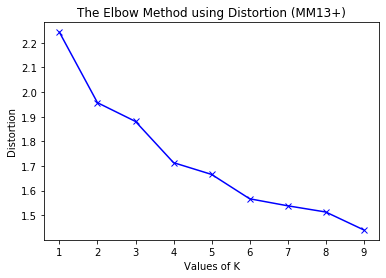

In [101]:
# Graphical format for results (Distortion)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion (MM13+)')
plt.show()

In [102]:
# Tabular format for results (Inertia)
for key,val in mapping2.items():
    print(str(key)+' : '+str(val))

1 : 7152810.000000001
2 : 5837671.297242902
3 : 5131972.759578439
4 : 4500713.368226746
5 : 4147761.189590879
6 : 3839032.0506530637
7 : 3594815.357519567
8 : 3367553.4421027005
9 : 3141681.1139040226


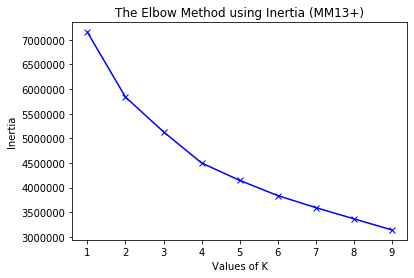

In [103]:
# Graphical format for results (Inertia)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia (MM13+)')
plt.show()

## Set K-means algorithm from elbow method

In [104]:
# Using KMeans to produce clustering results
kmodel1_3e = KMeans(n_clusters=3).fit(mm1_3cks)
kmodel4_6e = KMeans(n_clusters=3).fit(mm4_6cks)
kmodel7_12e= KMeans(n_clusters=3).fit(mm7_12cks)
kmodel13_e = KMeans(n_clusters=3).fit(mm13_cks)

In [105]:
labels1_3e = kmodel1_3e.labels_
labels4_6e = kmodel4_6e.labels_
labels7_12e = kmodel7_12e.labels_
labels13_e = kmodel13_e.labels_

## 3-cluster results review

#### Silhouette Coefficient (split due to slower computation)

In [106]:
metrics.silhouette_score(mm1_3cks,labels1_3e, metric='euclidean')

0.3892253912913495

In [107]:
metrics.silhouette_score(mm4_6cks,labels4_6e, metric='euclidean')

0.39853877147187244

In [108]:
metrics.silhouette_score(mm7_12cks,labels7_12e, metric='euclidean')

0.4142696477471372

In [125]:
metrics.silhouette_score(mm13_cks,labels13_e, metric='euclidean')

0.5104545196073687

#### Calinski-Harabasz Index

In [110]:
print(metrics.calinski_harabasz_score(mm1_3cks, labels1_3e))
print(metrics.calinski_harabasz_score(mm4_6cks, labels4_6e))
print(metrics.calinski_harabasz_score(mm7_12cks, labels7_12e))
print(metrics.calinski_harabasz_score(mm13_cks, labels13_e))

30304.973745554587
21815.8563465463
30559.215223865896
140829.19419201612


#### Davies-Bouldin Index

In [111]:
print(metrics.davies_bouldin_score(mm1_3cks, labels1_3e))
print(metrics.davies_bouldin_score(mm4_6cks, labels4_6e))
print(metrics.davies_bouldin_score(mm7_12cks, labels7_12e))
print(metrics.davies_bouldin_score(mm13_cks, labels13_e))

1.5641342972364611
1.5505987717415548
1.5752338562330577
1.4449655169013085


## Customers' clusters (based on 3 clusters)

In [115]:
# Convert array to series (to concatenate with original data set)
labels1_3se = pd.Series(labels1_3e)
labels4_6se = pd.Series(labels4_6e)
labels7_12se = pd.Series(labels7_12e)
labels13_se = pd.Series(labels13_e)

In [116]:
# Rejoining with original data
mm1_3re = pd.concat([mm1_3c, labels1_3se], axis=1)
mm4_6re = pd.concat([mm4_6c, labels4_6se], axis=1)
mm7_12re = pd.concat([mm7_12c, labels7_12se], axis=1)
mm13_re = pd.concat([mm13_c, labels13_se], axis=1)

In [117]:
# Rename last column name to cluster
mm1_3re = mm1_3re.rename(columns={0: 'cluster'})
mm4_6re = mm4_6re.rename(columns={0: 'cluster'})
mm7_12re = mm7_12re.rename(columns={0: 'cluster'})
mm13_re = mm13_re.rename(columns={0: 'cluster'})

In [118]:
# Breakdown into clusters
mm1_3re_cluster0 = mm1_3re[(mm1_3re.cluster==0)]
mm1_3re_cluster1 = mm1_3re[(mm1_3re.cluster==1)]
mm1_3re_cluster2 = mm1_3re[(mm1_3re.cluster==2)]

mm4_6re_cluster0 = mm4_6re[(mm4_6re.cluster==0)]
mm4_6re_cluster1 = mm4_6re[(mm4_6re.cluster==1)]
mm4_6re_cluster2 = mm4_6re[(mm4_6re.cluster==2)]

mm7_12re_cluster0 = mm7_12re[(mm7_12re.cluster==0)]
mm7_12re_cluster1 = mm7_12re[(mm7_12re.cluster==1)]
mm7_12re_cluster2 = mm7_12re[(mm7_12re.cluster==2)]

mm13_re_cluster0 = mm13_re[(mm13_re.cluster==0)]
mm13_re_cluster1 = mm13_re[(mm13_re.cluster==1)]
mm13_re_cluster2 = mm13_re[(mm13_re.cluster==2)]

## 3-cluster sanity checks (before output)

In [119]:
# Count (value check of individual clusters) for MM1-3
print("MM1-3/Cluster0 records:", len(mm1_3re_cluster0))
print("MM1-3/Cluster1 records:", len(mm1_3re_cluster1))
print("MM1-3/Cluster2 records:", len(mm1_3re_cluster2))
print("MM1-3 zero check:", len(mm1_3re_cluster0)+len(mm1_3re_cluster1)+len(mm1_3re_cluster2)-len(mm1_3c))

MM1-3/Cluster0 records: 122201
MM1-3/Cluster1 records: 10287
MM1-3/Cluster2 records: 32629
MM1-3 zero check: 0


In [120]:
# Count (value check of individual clusters) for MM4-6
print("MM4-6/Cluster0 records:", len(mm4_6re_cluster0))
print("MM4-6/Cluster1 records:", len(mm4_6re_cluster1))
print("MM4-6/Cluster2 records:", len(mm4_6re_cluster2))
print("MM4-6 zero check:", len(mm4_6re_cluster0)+len(mm4_6re_cluster1)+len(mm4_6re_cluster2)-len(mm4_6c))

MM4-6/Cluster0 records: 86659
MM4-6/Cluster1 records: 7900
MM4-6/Cluster2 records: 21854
MM4-6 zero check: 0


In [121]:
# Count (value check of individual clusters) for MM7-12
print("MM7-12/Cluster0 records:", len(mm7_12re_cluster0))
print("MM7-12/Cluster1 records:", len(mm7_12re_cluster1))
print("MM7-12/Cluster2 records:", len(mm7_12re_cluster2))
print("MM7-12 zero check:", len(mm7_12re_cluster0)+len(mm7_12re_cluster1)+len(mm7_12re_cluster2)-len(mm7_12c))

MM7-12/Cluster0 records: 29058
MM7-12/Cluster1 records: 11331
MM7-12/Cluster2 records: 125522
MM7-12 zero check: 0


In [122]:
# Count (value check of individual clusters) for MM13+
print("MM13+/Cluster0 records:", len(mm13_re_cluster0))
print("MM13+/Cluster1 records:", len(mm13_re_cluster1))
print("MM13+/Cluster2 records:", len(mm13_re_cluster2))
print("MM13+ zero check:", len(mm13_re_cluster0)+len(mm13_re_cluster1)+len(mm13_re_cluster2)-len(mm13_c))

MM13+/Cluster0 records: 588730
MM13+/Cluster1 records: 117149
MM13+/Cluster2 records: 9402
MM13+ zero check: 0


In [123]:
mm1_3re_cluster0d = mm1_3re_cluster0.describe()
mm1_3re_cluster1d = mm1_3re_cluster1.describe()
mm1_3re_cluster2d = mm1_3re_cluster2.describe()

mm4_6re_cluster0d = mm4_6re_cluster0.describe()
mm4_6re_cluster1d = mm4_6re_cluster1.describe()
mm4_6re_cluster2d = mm4_6re_cluster2.describe()

mm7_12re_cluster0d = mm7_12re_cluster0.describe()
mm7_12re_cluster1d = mm7_12re_cluster1.describe()
mm7_12re_cluster2d = mm7_12re_cluster2.describe()

mm13_re_cluster0d = mm13_re_cluster0.describe()
mm13_re_cluster1d = mm13_re_cluster1.describe()
mm13_re_cluster2d = mm13_re_cluster2.describe()

## Export 3-cluster results

In [124]:
# Export results for comparison
mm1_3re_cluster0d.to_csv(r'C:\Users\lyejie\de_1-3_cluster0e.csv')
mm1_3re_cluster1d.to_csv(r'C:\Users\lyejie\de_1-3_cluster1e.csv')
mm1_3re_cluster2d.to_csv(r'C:\Users\lyejie\de_1-3_cluster2e.csv')

mm4_6re_cluster0d.to_csv(r'C:\Users\lyejie\de_4-6_cluster0e.csv')
mm4_6re_cluster1d.to_csv(r'C:\Users\lyejie\de_4-6_cluster1e.csv')
mm4_6re_cluster2d.to_csv(r'C:\Users\lyejie\de_4-6_cluster2e.csv')

mm7_12re_cluster0d.to_csv(r'C:\Users\lyejie\de_7-12_cluster0e.csv')
mm7_12re_cluster1d.to_csv(r'C:\Users\lyejie\de_7-12_cluster1e.csv')
mm7_12re_cluster2d.to_csv(r'C:\Users\lyejie\de_7-12_cluster2e.csv')

mm13_re_cluster0d.to_csv(r'C:\Users\lyejie\de_13+_cluster0e.csv')
mm13_re_cluster1d.to_csv(r'C:\Users\lyejie\de_13+_cluster1e.csv')
mm13_re_cluster2d.to_csv(r'C:\Users\lyejie\de_13+_cluster2e.csv')